# FitFirst Study

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from pyvis.network import Network
from coloring.fit_first import fit_first
from utils import generate_k_colorable_graph

### Specify parameters here

In [47]:
N = 100    # Number of online k-colorable graphs to generate at each step
k_range = [2,3,4]
n_range = range(10,101)

In [48]:
def convert_to_dataframe(data:list) -> pd.DataFrame:
    df = pd.DataFrame(data, columns=['k', 'n', 'colors_used', 'ratio', 'N'])
    return df

In [49]:
# <k, n, colors_used, ratio, N>
data = []
for k in k_range:
    for n in tqdm(n_range):
        ratios = []
        for _ in range(N):
            # Initialize the graph
            G = generate_k_colorable_graph(k, n, 0.8)

            # Simulate online coloring
            for idx in range(1, n+1):
                subgraph = G.subgraph(range(idx))
                colors = fit_first(subgraph)
                # Color the graph
                for node, color in colors.items():
                    G.nodes[node]['group'] = color
                
            # Determine the number of colors used
            colors_used = len(set(colors.values()))

            # Determine the ratio of colors used
            ratio = colors_used / k
            ratios.append(ratio)
        
        # Append the data
        data.append([k, n, colors_used, np.mean(ratios), N])
        # Save checkpoint
        _df = convert_to_dataframe(data)
        _df.to_feather(f'../data/fit_first_2_checkpoint.ftr')

# Save the data
df = convert_to_dataframe(data)
df.to_feather(f'../data/fit_first_2.ftr')

100%|██████████| 91/91 [01:27<00:00,  1.05it/s]


In [50]:
df

,k,n,colors_used,ratio,N
0,2,10,3,1.1750,100
1,2,11,3,1.1550,100
2,2,12,3,1.1600,100
3,2,13,2,1.1200,100
4,2,14,2,1.1800,100
...,...,...,...,...,...
268,4,96,6,1.4375,100
269,4,97,4,1.5025,100
270,4,98,6,1.4925,100
271,4,99,5,1.4625,100


In [51]:
df[df.k==2]

,k,n,colors_used,ratio,N
0,2,10,3,1.175,100
1,2,11,3,1.155,100
2,2,12,3,1.160,100
3,2,13,2,1.120,100
4,2,14,2,1.180,100
...,...,...,...,...,...
86,2,96,4,1.130,100
87,2,97,2,1.170,100
88,2,98,2,1.115,100
89,2,99,2,1.150,100


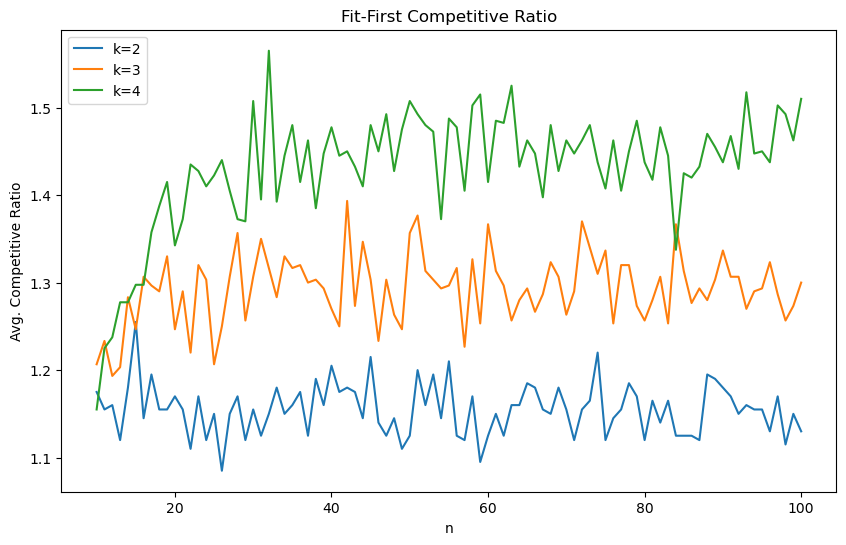

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
for k in k_range:
    _df = df[df.k==k]
    ax.plot(_df.n, _df.ratio, label=f'k={k}')
ax.set_xlabel('n')
ax.set_ylabel('Avg. Competitive Ratio')
ax.legend()
plt.title('Fit-First Competitive Ratio')
plt.show()